# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

In [245]:
# Import Libraries

import numpy as np
import pandas as pd
import itertools
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
import warnings

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [246]:
# reading and inspect the data
columns = ['id', 'diagnosis']
for k in ['mean', 'std_error', 'worst']:
    for c in ['radius', 'texture', 'perimeter', 'area', 'smoothness',
              'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']:
        columns.append('%s_%s' % (c, k))
df = pd.read_csv('../data/wdbc.csv', names=columns, index_col='id')
print(df.dtypes)
df.head()

diagnosis                       object
radius_mean                    float64
texture_mean                   float64
perimeter_mean                 float64
area_mean                      float64
smoothness_mean                float64
compactness_mean               float64
concavity_mean                 float64
concave_points_mean            float64
symmetry_mean                  float64
fractal_dimension_mean         float64
radius_std_error               float64
texture_std_error              float64
perimeter_std_error            float64
area_std_error                 float64
smoothness_std_error           float64
compactness_std_error          float64
concavity_std_error            float64
concave_points_std_error       float64
symmetry_std_error             float64
fractal_dimension_std_error    float64
radius_worst                   float64
texture_worst                  float64
perimeter_worst                float64
area_worst                     float64
smoothness_worst         

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [247]:
# get more information on the data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [248]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std_error', 'texture_std_error', 'perimeter_std_error',
       'area_std_error', 'smoothness_std_error', 'compactness_std_error',
       'concavity_std_error', 'concave_points_std_error', 'symmetry_std_error',
       'fractal_dimension_std_error', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [249]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [250]:
print(df.dtypes)

diagnosis                        int64
radius_mean                    float64
texture_mean                   float64
perimeter_mean                 float64
area_mean                      float64
smoothness_mean                float64
compactness_mean               float64
concavity_mean                 float64
concave_points_mean            float64
symmetry_mean                  float64
fractal_dimension_mean         float64
radius_std_error               float64
texture_std_error              float64
perimeter_std_error            float64
area_std_error                 float64
smoothness_std_error           float64
compactness_std_error          float64
concavity_std_error            float64
concave_points_std_error       float64
symmetry_std_error             float64
fractal_dimension_std_error    float64
radius_worst                   float64
texture_worst                  float64
perimeter_worst                float64
area_worst                     float64
smoothness_worst         

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [251]:
df_data = df.drop (columns = ['diagnosis'])
# Number of features
print('- Number of features: %d' % df.shape[1])
for c in df.columns:
    print('  - %s' % c)

# Data types
print('\n- Data types')
print(df.dtypes)

print('\n- Nulls')
for c in df.columns:
    print('  - %-16s: Nulls: %d' % (c, df[c].isna().sum()))

- Number of features: 31
  - diagnosis
  - radius_mean
  - texture_mean
  - perimeter_mean
  - area_mean
  - smoothness_mean
  - compactness_mean
  - concavity_mean
  - concave_points_mean
  - symmetry_mean
  - fractal_dimension_mean
  - radius_std_error
  - texture_std_error
  - perimeter_std_error
  - area_std_error
  - smoothness_std_error
  - compactness_std_error
  - concavity_std_error
  - concave_points_std_error
  - symmetry_std_error
  - fractal_dimension_std_error
  - radius_worst
  - texture_worst
  - perimeter_worst
  - area_worst
  - smoothness_worst
  - compactness_worst
  - concavity_worst
  - concave_points_worst
  - symmetry_worst
  - fractal_dimension_worst

- Data types
diagnosis                        int64
radius_mean                    float64
texture_mean                   float64
perimeter_mean                 float64
area_mean                      float64
smoothness_mean                float64
compactness_mean               float64
concavity_mean               

# Check for Outliers
for c in df_data.columns:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

In [252]:
# create X and y to match Scikit-Learn parlance

features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std_error', 'texture_std_error', 'perimeter_std_error',
       'area_std_error', 'smoothness_std_error', 'compactness_std_error',
       'concavity_std_error', 'concave_points_std_error', 'symmetry_std_error',
       'fractal_dimension_std_error', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
outcome = 'diagnosis'

# X include all the features
X = df[features].copy()
# y is the target variable
# Note: As it is a classification problem,
#       0 and 1 are converted to '0' and '1' (int to str)
y = df[outcome].astype(int).copy()

In [255]:
import statsmodels.api as sm

In [256]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.9}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.9}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  concave_points_worst           with p-value 1.96909971e-124
Add  radius_worst                   with p-value 9.97179982e-24
Add  texture_worst                  with p-value 3.39287414e-11
Add  area_worst                     with p-value 1.65889399e-05
Add  smoothness_std_error           with p-value 2.91154533e-07
Add  symmetry_worst                 with p-value 3.43003556e-05
Add  compactness_std_error          with p-value 0.00672452958
Add  radius_std_error               with p-value 0.00072695822
Add  fractal_dimension_worst        with p-value 0.0019580447
Add  compactness_mean               with p-value 0.00456211152
Add  concave_points_mean            with p-value 0.00103855334
Drop compactness_std_error          with p-value 0.0510578171
Add  fractal_dimension_std_error    with p-value 0.00583478865


/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


resulting features:
['concave_points_worst', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_std_error', 'symmetry_worst', 'radius_std_error', 'fractal_dimension_worst', 'compactness_mean', 'concave_points_mean', 'fractal_dimension_std_error']


In [257]:
# create X and y to match Scikit-Learn parlance

features = ['concave_points_worst', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_std_error', 'symmetry_worst', 'radius_std_error', 'fractal_dimension_worst', 'compactness_mean', 'concave_points_mean', 'fractal_dimension_std_error']
outcome = 'diagnosis'

# X include all the features
X = df[features].copy()
# y is the target variable
# Note: As it is a classification problem,
#       0 and 1 are converted to '0' and '1' (int to str)
y = df[outcome].astype(int).copy()

In [258]:
# Check the data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(df.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 569 rows and 11 columns
Basic Statistics about X__________________________________________________
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.0000

In [259]:
# About y
print('y is a %s' % type(y))
print('y has %d rows' % y.shape)
print('')
print('Sample of y%s' % ('_'*50))
print(y[:5])

y is a <class 'pandas.core.series.Series'>
y has 569 rows

Sample of y__________________________________________________
id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis, dtype: int64


# Visualise the data points

# visualise features in pairs
sns.pairplot(df)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [260]:
print('- What are the input variables (features)?')
print('  - %s' % ', '.join(features))
print('- Is there an output variable (label)?')
print('  - %s' % ('Yes' if outcome else 'No'))
print('- If there is an output variable:')
print('    - Which one is it?')
print('      - %s' % outcome)
print('    - What is its type?')
print('      - %s' % y.dtypes)
print('  - What type of Modelling is it?')
print('    - [%s] Supervised' % ('x' if outcome else ' '))
print('    - [%s] Unsupervised' % (' ' if outcome else 'x'))
print('  - What type of Modelling is it?')
print('    - [%s] Regression' % ('x' if y.dtypes != 'object' else ' '))
print('    - [%s] Classification (binary)' %
      ('x' if (y.dtypes == 'object') and (len(y.unique()) == 2) else ' '))
print('    - [%s] Classification (multi-class)' %
      ('x' if (y.dtypes == 'object') and (len(y.unique()) != 2) else ' '))
print('    - [%s] Clustering' % (' ' if outcome else 'x'))

- What are the input variables (features)?
  - concave_points_worst, radius_worst, texture_worst, area_worst, smoothness_std_error, symmetry_worst, radius_std_error, fractal_dimension_worst, compactness_mean, concave_points_mean, fractal_dimension_std_error
- Is there an output variable (label)?
  - Yes
- If there is an output variable:
    - Which one is it?
      - diagnosis
    - What is its type?
      - int64
  - What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised
  - What type of Modelling is it?
    - [x] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [261]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [262]:
# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=5)

# fit on the unstandardized data:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
model=RandomForestClassifier(n_estimators=100)

In [291]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [263]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_train_pred = knn.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_pred))

0.9318681318681319
0.9215976331360947


In [264]:
y_test_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.9298245614035088
0.9161480510972814


In [292]:
bagging = BaggingClassifier(
    base_estimator = model,
    n_estimators = 20,
    max_samples = 0.8,
    max_features = 0.8)

In [293]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_jobs=None,
       

In [294]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_train_pred = bagging.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_pred))

0.9956043956043956
0.9940828402366864


In [295]:
y_test_pred = bagging.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.9649122807017544
0.9580740255486406


In [296]:
# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = roc_curve(y_test, y_test_pred)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

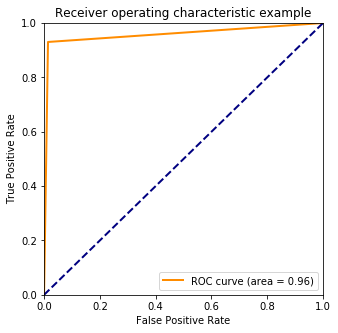

In [297]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

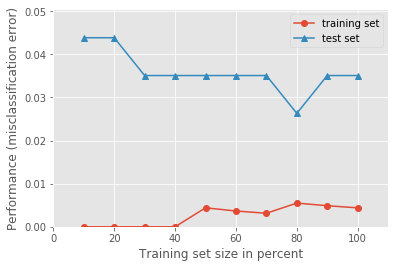

In [298]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

In [299]:
from sklearn.ensemble import AdaBoostClassifier

In [273]:
#clf = (criterion = 'entropy', max_depth = 4)

In [300]:
boosting = AdaBoostClassifier(base_estimator = model, n_estimators = 20)
boosting.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                        

In [301]:
y_train_pred = boosting.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_pred))

1.0
1.0


In [302]:
y_test_pred = boosting.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.9649122807017544
0.9580740255486406


In [303]:
# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = roc_curve(y_test, y_test_pred)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

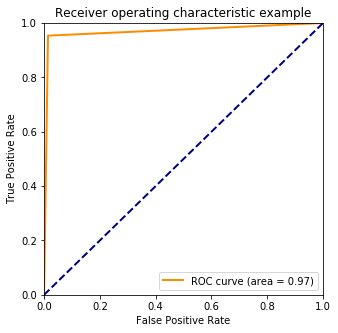

In [278]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

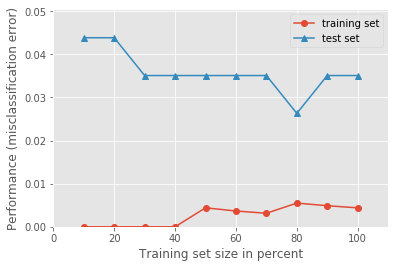

In [279]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [281]:
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf3 = GaussianNB()
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
sclf = StackingClassifier(
    classifiers = [knn, clf2, clf3],
    meta_classifier = lr)

In [282]:
sclf.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decreas

In [283]:
y_train_pred = sclf.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
print(roc_auc_score(y_train, y_train_pred))

0.9956043956043956
0.9940828402366864


In [284]:
y_test_pred = sclf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.9649122807017544
0.9580740255486406


In [285]:
# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = roc_curve(y_test, y_test_pred)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

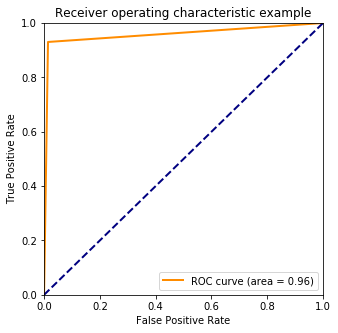

In [286]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

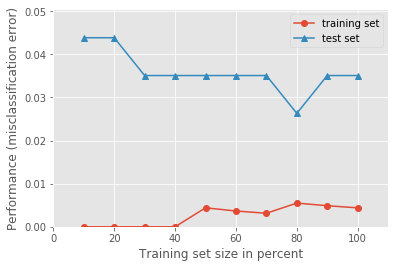

In [287]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>